#Clustering Menggunakan Algoritma K-Means (dengan Parameter Default)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah clustering dengan menggunakan algoritma K-Means yang bertujuan untuk memahami karakter customer pada e-commerce XYZ.

Parameter algoritma yang digunakan yaitu parameter default (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu Skema 1.


Fitur yang dipakai adalah 3 fitur yang paling berkolerasi satu sama lain yaitu:

1. OrderCount
2. CouponUsed
3. HourSpendOnApp


In [ ]:
#Data Loading

import pandas as pd

url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"
df = pd.read_excel(url, sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
#Update Dataframe berdasarkan fitur yang digunakan saja

df=df[['OrderCount', 'CouponUsed', 'HourSpendOnApp']]
df

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
4,1.0,1.0,NaN
...,...,...,...
5625,2.0,1.0,3.0
5626,2.0,1.0,3.0
5627,2.0,1.0,3.0
5628,2.0,2.0,4.0


In [ ]:
#Lihat rangkuman data apakah ada missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      5372 non-null   float64
 1   CouponUsed      5374 non-null   float64
 2   HourSpendOnApp  5375 non-null   float64
dtypes: float64(3)
memory usage: 132.1 KB


In [ ]:
#Handling Missing Values
import numpy as np

df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)
df.reset_index()
df = pd.concat([df], ignore_index=True)

<ipython-input-19-cef5e865a2ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4861 non-null   float64
 1   CouponUsed      4861 non-null   float64
 2   HourSpendOnApp  4861 non-null   float64
dtypes: float64(3)
memory usage: 114.1 KB


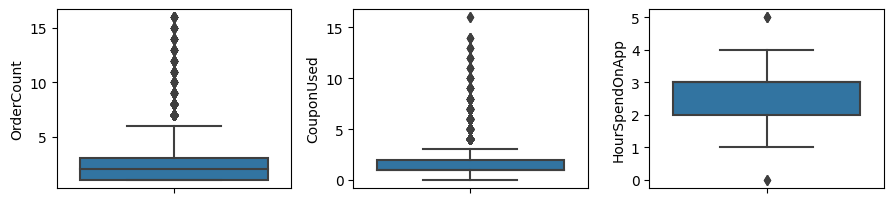

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#BoxPlot untuk melihat outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
#fungsi untuk trimming outliers dengan IQR (Inter-Quartile Range)

def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['OrderCount', 'CouponUsed', 'HourSpendOnApp'], dtype='object')

In [ ]:
#apply fungsi ke kolom yang memiliki outliers

cols_outliers = ['OrderCount', 'CouponUsed', 'HourSpendOnApp']
for col in cols_outliers:
    df = handle_outliers(df , col)

df.head()

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
5,1.0,0.0,2.0


In [ ]:
#Lihat rangkuman data setelah trimming outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4013 non-null   float64
 1   CouponUsed      4013 non-null   float64
 2   HourSpendOnApp  4013 non-null   float64
dtypes: float64(3)
memory usage: 125.4 KB


In [ ]:
#reset index sesuai jumlah baris data

df.reset_index()
df = pd.concat([df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4013 non-null   float64
 1   CouponUsed      4013 non-null   float64
 2   HourSpendOnApp  4013 non-null   float64
dtypes: float64(3)
memory usage: 94.2 KB


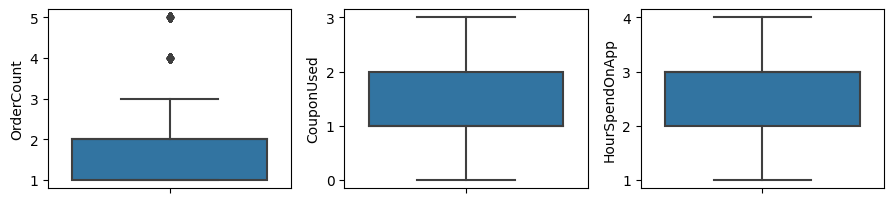

In [ ]:
#Boxplot setelah Trimming Outliers

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

<Axes: >

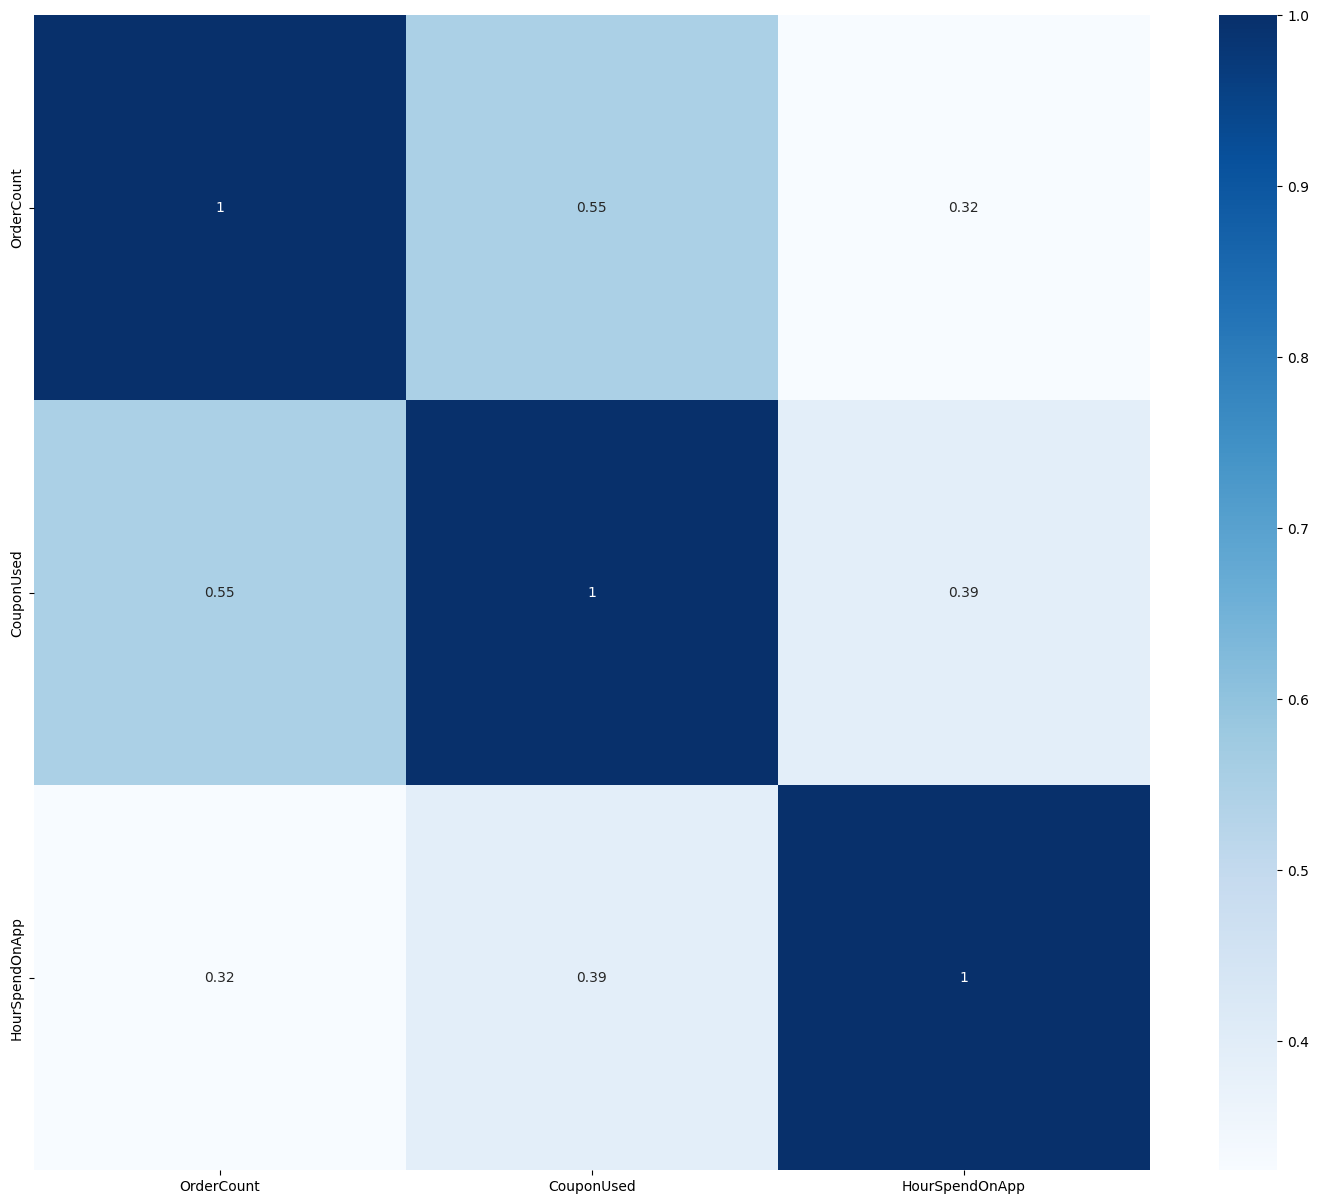

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!pip install -U yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
X = StandardScaler().fit_transform(df)
X

array([[-0.95316311, -0.20386864,  0.0950724 ],
       [-0.95316311, -1.43784278,  0.0950724 ],
       [-0.95316311, -1.43784278, -1.31277091],
       ...,
       [ 0.16233516, -0.20386864,  0.0950724 ],
       [ 0.16233516,  1.0301055 ,  1.50291571],
       [ 0.16233516,  1.0301055 ,  0.0950724 ]])

In [ ]:
#Dimensional Reduction dengan PCA untuk visualisasi data

from sklearn.decomposition import PCA

pca=PCA(n_components=2)

In [ ]:
fit_pca = pca.fit_transform(X)

In [ ]:
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

,PCA_1,PCA_2
4008,0.018971,-0.054923
4009,0.018971,-0.054923
4010,0.018971,-0.054923
4011,1.503933,-0.941001
4012,0.783474,0.251614


In [ ]:
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

finalDf = pd.concat([pca_df], axis = 1)
finalDf.head(5)

,PCA_1,PCA_2
0,-0.644989,-0.578940
1,-1.409491,-0.885477
2,-2.129950,0.307138
3,-2.129950,0.307138
4,-2.129950,0.307138


In [ ]:
finalDf.isnull().sum()

PCA_1    0
PCA_2    0
dtype: int64

In [ ]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   4013 non-null   float64
 1   PCA_2   4013 non-null   float64
dtypes: float64(2)
memory usage: 62.8 KB


#Skema 1

Model K-Means menggunakan n_clusters berdasarkan Metode Elbow dan parameter lainnya default.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

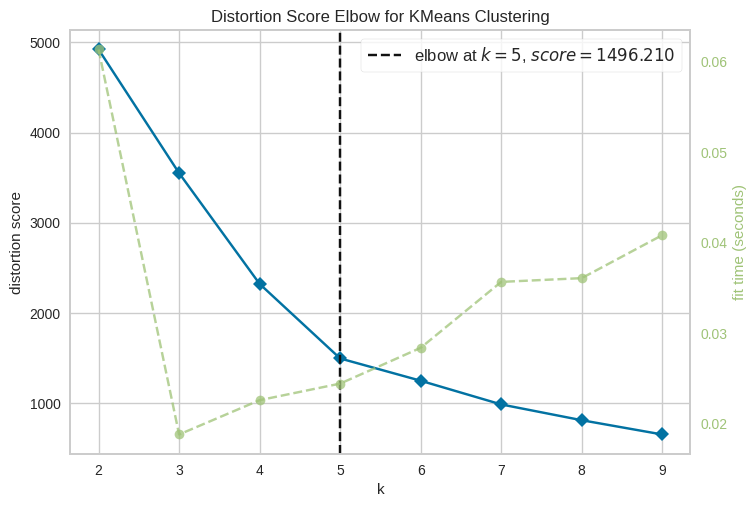

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Mencari n_cluster optimal

tes_model = KMeans() #parameter default
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(finalDf)
visualizer.show()

In [ ]:
#Berdasarkan hasil metode elbow, n_cluster = 5
jumlah_cluster = 5
model_kmeans = KMeans(n_clusters=jumlah_cluster)
model_kmeans.fit(finalDf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
#Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([1, 1, 2, ..., 0, 3, 0], dtype=int32)

In [ ]:
#centroid
print(model_kmeans.cluster_centers_)

[[ 0.38003739  0.22229866]
 [-0.99808664 -0.71519412]
 [-1.66680403  0.55815419]
 [ 1.21083363 -1.03310204]
 [ 2.16423823  1.28715682]]


In [ ]:
#Menggabungkan kolom dimensional reduction hasil clustering k-means dengan kolom data sebelumnya

df_pca_kmeans = pd.concat([pca_df.reset_index(drop=True), pd.DataFrame(df)], axis = 1)
df_pca_kmeans.columns.values[0:]
df_pca_kmeans['Clustering K-means PCA'] = model_kmeans.labels_
df_pca_kmeans.head()

,PCA_1,PCA_2,OrderCount,CouponUsed,HourSpendOnApp,Clustering K-means PCA
0,-0.644989,-0.578940,1.0,1.0,3.0,1
1,-1.409491,-0.885477,1.0,0.0,3.0,1
2,-2.129950,0.307138,1.0,0.0,2.0,2
3,-2.129950,0.307138,1.0,0.0,2.0,2
4,-2.129950,0.307138,1.0,0.0,2.0,2


In [ ]:
df_pca_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCA_1                   4013 non-null   float64
 1   PCA_2                   4013 non-null   float64
 2   OrderCount              4013 non-null   float64
 3   CouponUsed              4013 non-null   float64
 4   HourSpendOnApp          4013 non-null   float64
 5   Clustering K-means PCA  4013 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 172.6 KB


In [ ]:
df_pca_kmeans['Cluster'] = df_pca_kmeans['Clustering K-means PCA'].map({0:'cluster 1', 1:'cluster 2', 2:'cluster 3', 3:'cluster 4', 4:'cluster 5'})

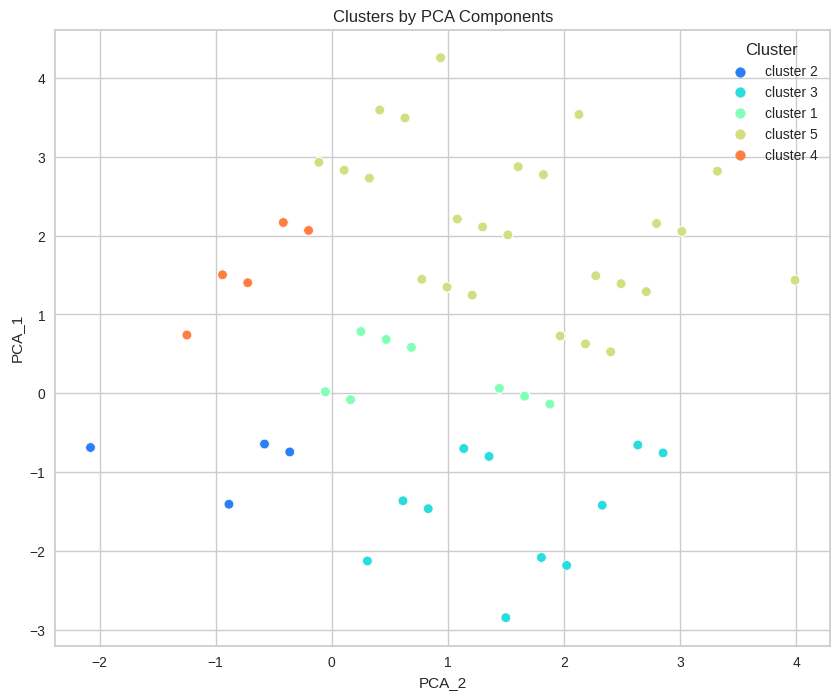

In [ ]:
x_axis = df_pca_kmeans['PCA_2']
y_axis = df_pca_kmeans['PCA_1']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=df_pca_kmeans, x=x_axis, y=y_axis, hue=df_pca_kmeans['Cluster'], palette ='rainbow')
plt.title('Clusters by PCA Components')
plt.show()

In [ ]:
#Evaluasi
SC_kmeans = silhouette_score(finalDf, labels_kmeans, metric='euclidean')
print('Silhouette Score model K-means (n_cluster optimal dengan metode Elbow)= ', SC_kmeans)

Silhouette Score model K-means (n_cluster optimal dengan metode Elbow)=  0.6138152194249947


In [ ]:
df_pca_kmeans['Hasil_Clustering'] = labels_kmeans
df_pca_kmeans

,PCA_1,PCA_2,OrderCount,CouponUsed,HourSpendOnApp,Clustering K-means PCA,Cluster,Hasil_Clustering
0,-0.644989,-0.578940,1.0,1.0,3.0,1,cluster 2,1
1,-1.409491,-0.885477,1.0,0.0,3.0,1,cluster 2,1
2,-2.129950,0.307138,1.0,0.0,2.0,2,cluster 3,2
3,-2.129950,0.307138,1.0,0.0,2.0,2,cluster 3,2
4,-2.129950,0.307138,1.0,0.0,2.0,2,cluster 3,2
...,...,...,...,...,...,...,...,...
4008,0.018971,-0.054923,2.0,1.0,3.0,0,cluster 1,0
4009,0.018971,-0.054923,2.0,1.0,3.0,0,cluster 1,0
4010,0.018971,-0.054923,2.0,1.0,3.0,0,cluster 1,0
4011,1.503933,-0.941001,2.0,2.0,4.0,3,cluster 4,3


In [ ]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Apakah ini kelompok customer berpotensi churn? ', df[df_pca_kmeans['Hasil_Clustering']==i]['Churn'].mode())
  print('Rata-rata review customer : ', df[df_pca_kmeans['Hasil_Clustering']==i]['SatisfactionScore'].mean())
  print('Apakah customer komplain di bulan terakhir?  ', df[df_pca_kmeans['Hasil_Clustering']==i]['Complain'].mode())
  print('Tipe Marital Status : ', df[df_pca_kmeans['Hasil_Clustering']==i]['MaritalStatus'].mode())
  print('Apa kategori produk yang sering dibeli oleh customer?  ', df[df_pca_kmeans['Hasil_Clustering']==i]['PreferedOrderCat'].mode())
  print('Banyak device yang digunakan :  ', df[df_pca_kmeans['Hasil_Clustering']==i]['NumberOfDeviceRegistered'].mode())

Cluster ke-0


KeyError: ignored

In [ ]:
#Decoding

#Churn 0 = Kembali berbelanja
#Churn 1 = Tidak berbelanja lagi
#Complain 1 = Melakukan komplain di bulan terakhir
#Complain 0 = Tidak melakukan komplain di bulan terakhir
#PreferedOrderCat 0 = Fashion
#PreferedOrderCat 1 = Grocery
#PreferedOrderCat 2 = Laptop & Accesory
#PreferedOrderCat 3 = Mobile Phone
#PreferedOrderCat 4 = Others
#MaritalStatus 0 = Divorced
#MaritalStatus 1 = Married
#MaritalStatus 2 = Single
#SatisfactionScore 1 - 5
#NumberOfDeciveRegistered 1-6



Penarikan Kesimpulan Berdasarkan n_cluster = 4 (Metode Elbow)

1. Cluster 0 -->
2. Cluster 1 -->
3. Cluster 2 -->
4. Cluster 3 -->